In [2]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# 1.데이터 불러오기 : keras mnist파일을 불러오기
# info, describe
# shape : (60000,28,28)
# class : 0-9까지 10개
(train_data,train_label),(test_data,test_label) = keras.datasets.fashion_mnist.load_data()

# print(train_data.shape)
# print(train_label[:5])
# print(np.unique(train_label))

# 2. 정규화, 표준화작업
train_data = train_data/255
test_data = test_data/255

# 3. train,test데이터 분리
# (45000, 28, 28)
# (15000, 28, 28)
train_scaled,val_scaled,train_label,val_label = train_test_split(train_data,train_label)

# ------------------------------------------------------
# 4. 딥러닝선언 - 인공신경망 ANN,DNN  / 합성곱신경망-CNN  / 순환신경망 - RNN
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.3)) # 규제 30% 제외
model.add(keras.layers.Dense(10,activation='softmax'))
# 옵티마이저 추가 0.85 -> 0.88
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

# 콜백 : epochs 20번 반복하면서 가장 손실률이 낮은 시점을 찾아서 model저장
# 콜백 선언
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')

# 조기종료 : 손실곡선이 해당횟수이상되면 종료하고 가장 낮은 손실률로 이동저장
# 조기종료 선언 patience:상승횟수 restore_best_weights : 가장낮은 손실률 위치로 이동
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)



Epoch 1/20
1407/1407 [==============================] - 2s 1ms/step - loss: 0.5986 - accuracy: 0.7882 - val_loss: 0.4217 - val_accuracy: 0.8461
Epoch 2/20
1407/1407 [==============================] - 2s 1ms/step - loss: 0.4410 - accuracy: 0.8404 - val_loss: 0.4006 - val_accuracy: 0.8548
Epoch 3/20
1407/1407 [==============================] - 2s 1ms/step - loss: 0.4051 - accuracy: 0.8526 - val_loss: 0.3724 - val_accuracy: 0.8665
Epoch 4/20
1407/1407 [==============================] - 2s 1ms/step - loss: 0.3834 - accuracy: 0.8598 - val_loss: 0.3592 - val_accuracy: 0.8702
Epoch 5/20
1407/1407 [==============================] - 2s 1ms/step - loss: 0.3683 - accuracy: 0.8652 - val_loss: 0.3432 - val_accuracy: 0.8747
Epoch 6/20
1407/1407 [==============================] - 2s 1ms/step - loss: 0.3575 - accuracy: 0.8684 - val_loss: 0.3422 - val_accuracy: 0.8778
Epoch 7/20
1407/1407 [==============================] - 2s 1ms/step - loss: 0.3468 - accuracy: 0.8722 - val_loss: 0.3326 - val_accuracy:

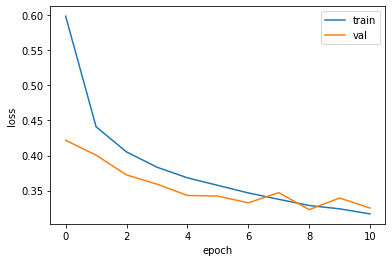

469/469 [==============================] - 0s 855us/step - loss: 0.3229 - accuracy: 0.8843
[0.32294589281082153, 0.8842666745185852]


In [3]:

# 5. 딥러닝 훈련
history = model.fit(train_scaled,train_label,epochs=20,\
    validation_data=(val_scaled,val_label),callbacks=[checkpoint_cb,early_stopping_cb])
# history로 넘어온 변수 loss,accuracy,val_loss,val_accuracy
print(history.history.keys()) 
print(history.history['loss'])

print("epoch 회수 : ",early_stopping_cb.stopped_epoch)

# 그래프 출력
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

# 6. 정확도
score = model.evaluate(val_scaled,val_label)
print(score)